In [1]:
import PyPDF2
import os
import tabula
import nltk
import operator as op
import keras
import re
import string
import math
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import idx2numpy
import random as random
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
pwd

'/Users/abhinavgudipati/Desktop'

In [3]:
os.chdir("/Users/abhinavgudipati/Desktop/SML_Assignment_03/")

# Question 1 ( CIFAR-10 Dataset ) 

# Question 1.1 :- Visualising 5 Samples from each Class

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
pwd

'/Users/abhinavgudipati/Desktop/SML_Assignment_03'

In [6]:
file_1 = '/Users/abhinavgudipati/Desktop/SML_Assignment_03/cifar-10-batches-py/data_batch_1'
file_2 = '/Users/abhinavgudipati/Desktop/SML_Assignment_03/cifar-10-batches-py/data_batch_2'
file_3 = '/Users/abhinavgudipati/Desktop/SML_Assignment_03/cifar-10-batches-py/data_batch_3'
file_4 = '/Users/abhinavgudipati/Desktop/SML_Assignment_03/cifar-10-batches-py/data_batch_4'
file_5 = '/Users/abhinavgudipati/Desktop/SML_Assignment_03/cifar-10-batches-py/data_batch_5'
test_file = '/Users/abhinavgudipati/Desktop/SML_Assignment_03/cifar-10-batches-py/test_batch'

In [7]:
data_batch_1 = unpickle(file_1)
data_batch_2 = unpickle(file_2)
data_batch_3 = unpickle(file_3)
data_batch_4 = unpickle(file_4)
data_batch_5 = unpickle(file_5)
test_batch = unpickle(test_file)

In [8]:
test_batch.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Visualising 5 Images from each class

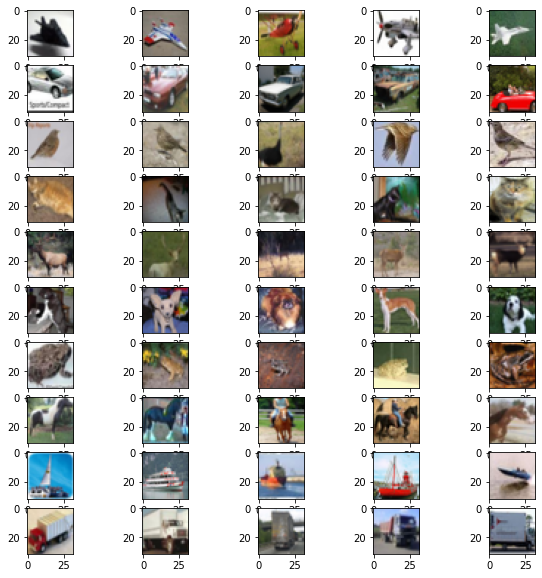

In [11]:
a = 0
classLabel = 0
new =0
b = 10 
d = 10
plt.figure(figsize=(b,d))

for i in range(50):
  for j in range(new,len(y_train)):
    if op.eq(y_train[j],a):
      plt.subplot(10,5,op.add(i,1))
      plt.imshow(x_train[j])
      new = op.add(j,1)
      if op.lt(classLabel,4):
        classLabel= op.iadd(classLabel,1)
        break;
      else:
        classLabel=0;
        a= op.iadd(a,1)
        break;
plt.show()        

# Question 1.2

In [12]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [13]:
X_train = X_train.reshape(50000,3*32*32)
X_test = X_test.reshape(10000,3*32*32)

In [14]:
def reports():
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, Y_train)
    y_pred = lda.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    entireReport = classification_report(Y_test,y_pred)
    confusionMat = confusion_matrix(Y_test,y_pred)
    accu = confusionMat.diagonal()/confusionMat.sum(axis=1)
    points = [0,1,2,3,4,5,6,7,8,9]
    for i in range(10):
        print(f'Accuracy of class {i} is {accu[i]}')
    print(accu)
    print("Overall Accuracy:",accuracy)
    print(entireReport)

In [15]:
reports()

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of class 0 is 0.463
Accuracy of class 1 is 0.415
Accuracy of class 2 is 0.255
Accuracy of class 3 is 0.245
Accuracy of class 4 is 0.271
Accuracy of class 5 is 0.329
Accuracy of class 6 is 0.413
Accuracy of class 7 is 0.404
Accuracy of class 8 is 0.494
Accuracy of class 9 is 0.424
[0.463 0.415 0.255 0.245 0.271 0.329 0.413 0.404 0.494 0.424]
Overall Accuracy: 0.3713
              precision    recall  f1-score   support

           0       0.43      0.46      0.45      1000
           1       0.43      0.41      0.42      1000
           2       0.26      0.26      0.26      1000
           3       0.25      0.24      0.25      1000
           4       0.32      0.27      0.29      1000
           5       0.30      0.33      0.31      1000
           6       0.38      0.41      0.40      1000
           7       0.44      0.40      0.42      1000
           8       0.47      0.49      0.48      1000
           9       0.42      0.42      0.42      1000

    accuracy               